In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
# Generate synthetic temperature data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', periods=365, freq='D')
temperature = 20 + np.sin(np.linspace(0, 3.14 * 2, 365)) * 10 + np.random.randn(365) * 2

In [3]:
# Create DataFrame
df = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

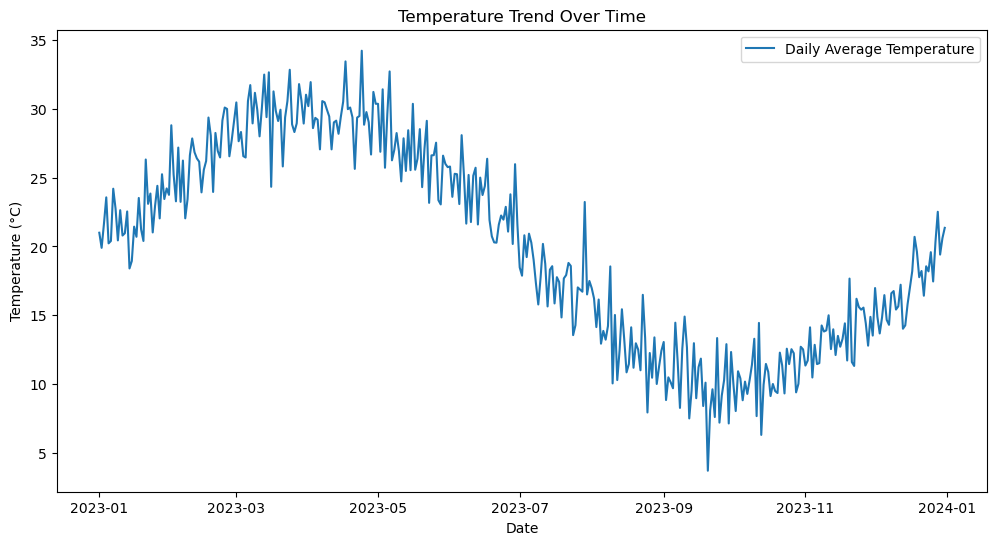

In [4]:
# Plot the temperature trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.show()

In [5]:
# Naïve Forecasting Model (assume tomorrow's temperature is the same as today's)
df['Naive_Forecast'] = df['Temperature'].shift(1)

In [6]:
# Moving Average Model (predict using the average of the last 7 days)
df['Moving_Avg_Forecast'] = df['Temperature'].rolling(window=7).mean().shift(1)

In [7]:
# Drop the first 7 rows due to NaN values in Moving Average
df.dropna(inplace=True)

In [8]:
# Evaluate models using Mean Absolute Error (MAE)
mae_naive = mean_absolute_error(df['Temperature'], df['Naive_Forecast'])
mae_moving_avg = mean_absolute_error(df['Temperature'], df['Moving_Avg_Forecast'])

In [9]:
# Select the best model and predict the next 7 days
if mae_moving_avg < mae_naive:
    best_model = 'Moving Average'
    last_7_days = df['Temperature'].iloc[-7:].mean()
    forecast = [last_7_days] * 7
else:
    best_model = 'Naïve Forecast'
    last_value = df['Temperature'].iloc[-1]
    forecast = [last_value] * 7

In [10]:
# Print results
print(f"Best Model: {best_model}")
print(f"MAE (Naïve Forecast): {mae_naive:.4f}")
print(f"MAE (Moving Average): {mae_moving_avg:.4f}")
print(f"Predicted Temperatures for Next 7 Days: {forecast}")

Best Model: Moving Average
MAE (Naïve Forecast): 2.2122
MAE (Moving Average): 1.6084
Predicted Temperatures for Next 7 Days: [20.17421594738078, 20.17421594738078, 20.17421594738078, 20.17421594738078, 20.17421594738078, 20.17421594738078, 20.17421594738078]
